# Dead End Fouling Models

Imput the filename:

In [39]:
file = 'MW_NF90.csv'

Required modules:

In [40]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Cross flow models
* Complete pore blocking - returns a list containing predicted fluxs at imputed time (t)
* Internal pore blocking - returns a list containing predicted fluxs at imputed time (t)
* Partial pore blocking - returns a list containing predicted fluxs at imputed time (t)
* Cake formation - returns a list containing predicted times at imputed flux (f)

In [41]:
def complete_pore_blocking( t, k):
    return J0*np.exp(-k*t)
def internal_pore_blocking(t, k):
    A=1
    return J0/(1+(1/2)*k*np.sqrt(A*J0)*t)
def partial_pore_blocking(t, k):
    A = 1
    return J0*(1+k*(A*J0)*t)**(-1)
def cake_formation(t, k):
    A = 1
    return J0/np.sqrt(1+2*k*((A*J0)**2)*t)

Opening .csv file as a DataFrame

In [42]:
df = pd.read_csv(file)

* J0 - initial flux
* Jst - initial estimation for the flux at stationary state
* A - membnrane area 

In [43]:
J0 = df.iloc[0]['Flux']
df['Flux'] = df['Flux']/J0
Jst_pr = df.iloc[-1]['Flux']
#A = 0.0140  # membrane area in m2

Parameter determination - fitting the model to the imput data

In [44]:
cpb_popt, cpb_pcov = curve_fit(complete_pore_blocking, 
                               df[:]['Time'], df[:]['Flux'],  
                               p0=[0.001])
print('Complete pore blocking',cpb_popt)

ipb_popt, ipb_pcov = curve_fit(internal_pore_blocking, 
                               df[:]['Time'], df[:]['Flux'],  
                               p0=[0.01])
print('Internal pore blocking', ipb_popt)

ppb_popt, ppb_pcov = curve_fit(partial_pore_blocking, 
                               df[:]['Time'], df[:]['Flux'],  
                               p0=[0.001])
print('Partial pore blocking', ppb_popt)

cf_popt, cf_pcov = curve_fit(cake_formation, 
                             df[:]['Time'], df[:]['Flux'],  
                             p0=[0.001],  maxfev=10000)
print('Cake formation', cf_popt)

Complete pore blocking [0.0022001]
Internal pore blocking [0.00487882]
Partial pore blocking [0.00243941]
Cake formation [0.0027065]


Ploting the results

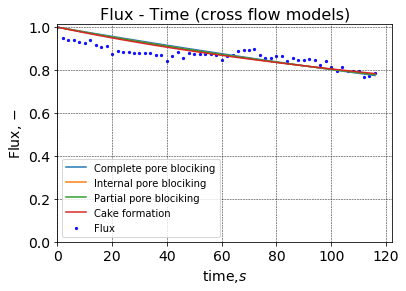

In [45]:
#Ploting the values predicted by the fitted models
plt.plot(df['Time'], complete_pore_blocking(df['Time'],*cpb_popt ), 
         label='Complete pore blociking')
plt.plot(df['Time'], internal_pore_blocking(df['Time'],*ipb_popt ), 
         label='Internal pore blociking')
plt.plot(df['Time'], partial_pore_blocking(df['Time'],*ppb_popt ), 
         label='Partial pore blociking')
plt.plot( df['Time'], cake_formation(df['Time'],*cf_popt ),  
         label='Cake formation')


#Ploting the inital data and plot editing
plt.scatter(df['Time'], df['Flux'], s=5, color='b', alpha=0.9)
plt.title('Flux - Time (cross flow models)', size=16)
plt.xlabel('time,$s$', size=14)
plt.ylabel('Flux, $-$', size=14)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.tick_params(labelsize=14)
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color='.1', zorder=-10)
plt.show()

Saving the data as an Excel spreadsheet

In [46]:
df['complete pore blocking'] = complete_pore_blocking(df['Time'],*cpb_popt )
df['internal_pore_blocking'] = internal_pore_blocking(df['Time'],*ipb_popt )
df['partial_pore_blocking'] = partial_pore_blocking(df['Time'],*ppb_popt )
df['cake_formation'] = cake_formation(df['Time'],*cf_popt )


writer = pd.ExcelWriter(file + '_fouling_modela_results.xlsx')
df.to_excel(writer, 'Sheet1')
writer.save()

df.head()

,Time,Flux,complete pore blocking,internal_pore_blocking,partial_pore_blocking,cake_formation
0,0,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,0.951613,0.995609,0.995145,0.995145,0.994631
2,4,0.941935,0.991238,0.990337,0.990337,0.989347
3,6,0.938710,0.986886,0.985575,0.985575,0.984146
4,8,0.929032,0.982553,0.980858,0.980858,0.979027
